# Prática 8

Aprendizado Dinâmico

por Cibele Russo (ICMC/USP - São Carlos SP)

MBA em Ciências de Dados



Nesta prática vamos considerar um modelo de sobrevivência com covariáveis, especificamente um modelo de Cox.
Fonte: https://www.kaggle.com/bryanb/survival-analysis-with-cox-model-implementation

Deseja-se modelar o tempo até a morte de pacientes de câncer de mama em até 5 anos após uma cirurgia para a retirada de nódulos. Os dados são descritos no arquivo haberman.csv.

Descrição de dados

- Age: Idade do paciente no momento da operação;
- Operation_year: ano de operação do paciente (ano - 19XX);
- Nb_pos_detected: Número de nódulos axilares positivos detectados;
- Surv: Status de sobrevivência (atributo de classe) 1 = o paciente sobreviveu 5 anos ou mais 2 = o paciente morreu dentro de 5 anos;

Desenvolva um estudo com modelo de sobrevivência incluindo como covariáveis o ano da operação e o número de nódulos axilar positivos detectados. Assuma que um teste estatístico foi realizado e apontou para a proporcionalidade dos riscos.


**1.Faça a leitura das bibliotecas.**

In [1]:
#!pip install pandas_profiling==3.0.0

In [2]:
#!pip install lifelines

In [3]:
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter

%matplotlib inline


**2. Leia os dados do arquivo haberman.csv.**

In [4]:
pkgdir = 'dados'
# pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'

data = pd.read_csv(f'{pkgdir}/haberman.csv', names = ['Age','Operation_year','Nb_pos_detected','Surv'])
data.head()


,Age,Operation_year,Nb_pos_detected,Surv
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**3. Use o pandas_profiling para produzir um relatório de análises exploratórias**

Comando:

pandas_profiling.ProfileReport(data)

In [5]:
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**4. Estime a curva de sobrevivência com o estimador de Kaplan-Meier**

In [6]:
data.columns

Index(['Age', 'Operation_year', 'Nb_pos_detected', 'Surv'], dtype='object')

<AxesSubplot:xlabel='timeline'>

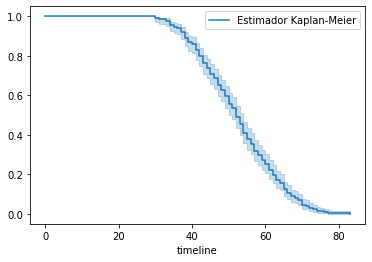

In [7]:
from lifelines import KaplanMeierFitter

E = data['Surv']  # Evento Ocorre ou Não Ocorre
T = data['Age']   # Tempo de Sobrevida

kmf = KaplanMeierFitter(label="Estimador Kaplan-Meier")
kmf.fit(T, E)
kmf.plot()

**5. Utilize o estimador de Kaplan-Meier com dois grupos, um deles com pelo menos um nódulo axilar.**

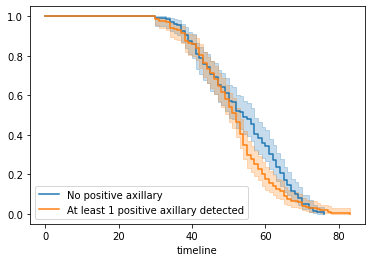

In [8]:
# Múltiplos Grupos
groups = data['Nb_pos_detected']
ix = (groups >= 1)

E = data['Surv']  # Evento Ocorre ou Não Ocorre
T = data['Age']   # Tempo de Sobrevida

kmf.fit(T[~ix], E[~ix], label='No positive axillary')
ax = kmf.plot()

kmf.fit(T[ix], E[ix], label='At least 1 positive axillary detected')
ax = kmf.plot(ax=ax)

**6. Ajuste um modelo de Cox com covariáveis Operatio_year e Nb_pos_detected. Interprete os resultados**

<lifelines.CoxPHFitter: fitted with 306 total observations, 0 right-censored observations>
             duration col = 'Age'
                event col = 'Surv'
      baseline estimation = breslow
   number of observations = 306
number of events observed = 306
   partial log-likelihood = -1446.95
         time fit was run = 2021-09-09 01:29:39 UTC

---
                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                               
Operation_year   -0.02       0.98       0.02            -0.06             0.01                 0.94                 1.01
Nb_pos_detected   0.01       1.01       0.01            -0.00             0.03                 1.00                 1.03

                    z    p   -log2(p)
covariate                            
Operation_year  -1.39 0.16       2.61
Nb_pos_detected  1.70 0.09       3.47
---
Concordance = 0.53
Partial AIC = 2897.90
log-likelihood ratio test = 4.50 on 2 df
-log2(p) of ll-ratio test = 3.25

<AxesSubplot:xlabel='log(HR) (95% CI)'>

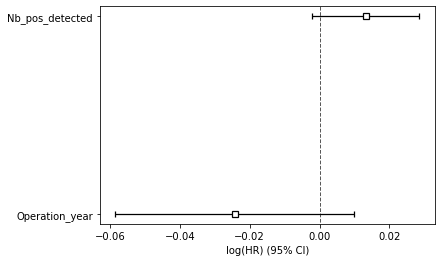

In [9]:
from lifelines import CoxPHFitter

# Using Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(data, 'Age', event_col='Surv')
cph.print_summary()

cph.plot()

Num nível de confiança alpha=5%, o p-valor é > 0.05 para ambas as covariáveis estudadas.<br>
Significa que o zero está no intervalo de confiança do coeficiente.<br>
Da mesma forma, significa que o 1 está no intervalo de confiança da exponencial do coeficiente.<br>
Então, a hipótese nula não é rejeitada, e as 2 covariáveis 'Operation_year' e 'Nb_pos_detected' não têm relevância estatística para o modelo.<br>
Uma forma de estreitar o intervalo de confiança é aumentar o número de exemplos.<br>

**7. Selecione três pacientes de forma aleatória para fazer a previsão da curva de sobrevivência para cada um deles**

In [10]:
patients = [4,125,211]

rows_selected = data.iloc[patients, 1:3]
rows_selected

,Operation_year,Nb_pos_detected
4,65,4
125,64,0
211,67,0


**8. Faça a previsão da curva de sobrevivência para cada um dos pacientes selecionados acima**

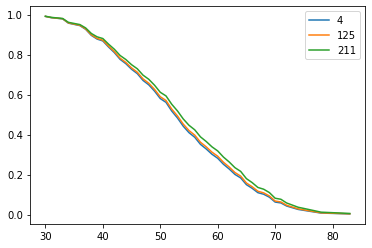

In [11]:
cph.predict_survival_function(rows_selected).plot();

Como era de se esperar, as covariáveis estudadas não têm relevância estatística para o modelo e para todos os casos as curvas são muito próximas, se fosse usada a previsão intervalar não seria possível dintinguir uma curva das outras.<br>
As pequenas diferenças apresentadas no gráfico de previsão pontual são devidas meramente ao acaso.<br>